In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

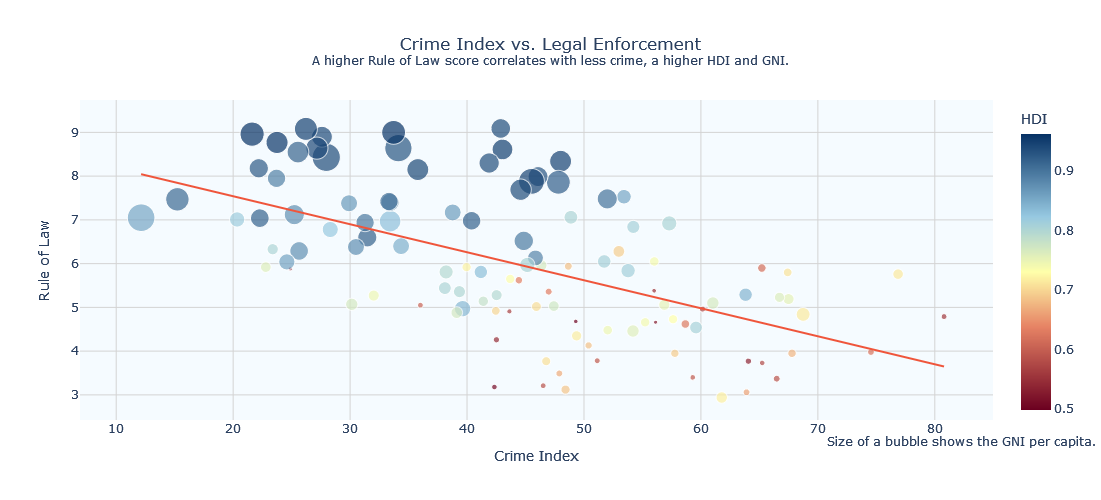

In [25]:
hfi = pd.read_csv("datasets/hfi-2023.csv")
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")

hfi2021 = hfi[hfi["year"] == 2021]
hfi2021.rename(columns = {'countries': 'country'}, inplace = True)
crimehfi = crime.join(hfi2021.set_index('country'), on='country', how = "inner")

HDI = pd.read_csv("datasets/Human Development Index.csv")
HDI_score = HDI[["Country", 'Human Development Index (2021)', 'Gross National Income Per Capita (2021)']].dropna()
HDI_score.rename(columns = {'Country': 'country', 'Human Development Index (2021)' : 'HDI', 'Gross National Income Per Capita (2021)': 'GNI per Capita'}, inplace = True)

crimehdfi = crimehfi.join(HDI_score.set_index('country'), on='country', how = "inner")

custom_color_scale = [
    [0.0, 'rgb(107,0,32)'],
    [0.3, 'rgb(230,130,100)'],
    [0.5, 'rgb(255, 255, 170)'],
    [0.7, 'rgb(150, 200, 225)'],
    [1.0, 'rgb(6,49,100)']
]

# Create scatterplot
fig = px.scatter(crimehdfi, 
                 x='crimeIndex', 
                 y='ef_legal', 
                 color='HDI',
                size='GNI per Capita',  # Use GDP_per_capita for dot sizes
                 size_max=20,  # Maximum size of the dots
                 color_continuous_scale= custom_color_scale,  # You can choose any color scale
                 title='Crime Index vs. Legal Enforcement<br><sup>A higher Rule of Law score correlates with less crime, a higher HDI and GNI.</sup>',
                 labels={'crimeIndex': 'Crime Index', 'ef_legal': 'Rule of Law'},
                 trendline='ols',
                 hover_name='country')

fig.update_layout(
    height=500,
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='rgba(152,214,255,0.1)',  # background color
    xaxis=dict(
        gridcolor='lightgrey',  # Set x-axis gridline color
        zerolinecolor='grey'  # Set x-axis zero line color
    ),
    yaxis=dict(
        gridcolor='lightgrey',  # Set y-axis gridline color
        zerolinecolor='grey'  # Set y-axis zero line color
    ),
)

fig.add_annotation(x=1.12, y=-0.10,
                   xref="paper", yref="paper",
                   align='right',
                   xanchor='right', yanchor='bottom',
                   showarrow=False,
                   text='Size of a bubble shows the GNI per capita.'
                  )

# Show the figure
fig.show()